In [454]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8) # Adjusts the configuration of the created plots

# Read data

movies = pd.read_csv("movies.csv")
movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [455]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### Clean and Format data

In [456]:
# find missing values for each column
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [457]:
#handle 'O' missing values
for col in movies.columns:
    if(movies[col].dtype == "object"):
        movies[col].replace(np.nan, "NO "+col, inplace=True)

In [465]:
movies["budget"].dtypes

dtype('float64')

In [466]:
#handle int or float missing values
for col in movies.columns:
    if(movies[col].dtype == "float"):
        movies[col].replace(np.nan, movies[col].mean(), inplace=True)

In [467]:
# movies.isnull().sum()
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [470]:
# column data types
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [469]:
# change data type of columns
movies["budget"] = movies["budget"].astype("int64")
movies["gross"] = movies["gross"].astype("int64")

In [380]:
# create a new column: correct released column
# movies["yearCorrect"] = movies["released"].[:]

In [471]:
movies.sort_values(by="gross", inplace=True, ascending=False)

In [472]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [473]:
pd.set_option("max_rows", 60)

In [474]:
movies.drop_duplicates(inplace=True)

In [475]:
# budget high correlation
# company high correlation

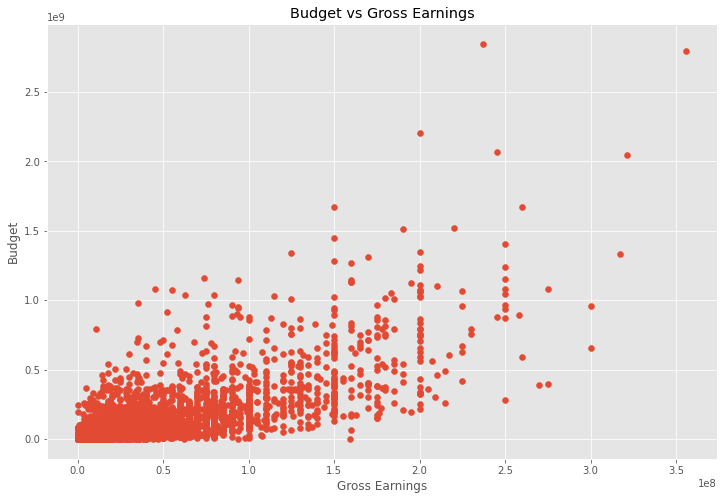

In [476]:
# sctater plot with budget vs gross
plt.scatter(x=movies["budget"], y=movies["gross"])

plt.title("Budget vs Gross Earnings")

plt.xlabel("Gross Earnings")
plt.ylabel("Budget")

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

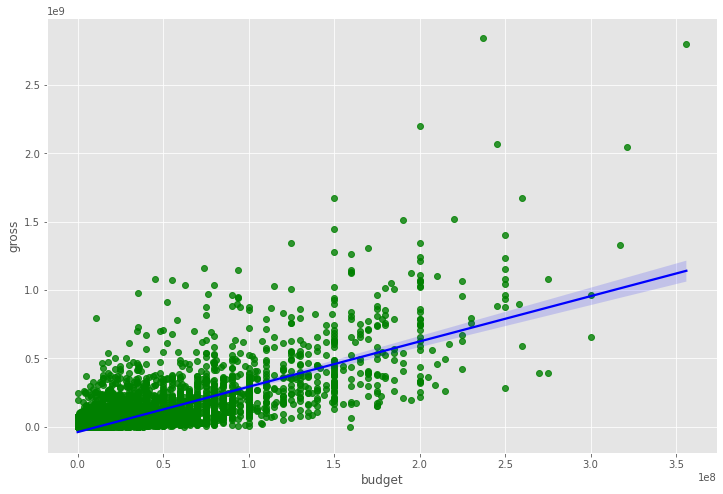

In [477]:
# determine if the attributes are correlated using seaborn
# regplot

sns.regplot(x="budget", y="gross", data=movies, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
# line going up means it is first of all correlated, but how ?

In [478]:
# corr is just use for numerical fields
movies.corr(method="pearson") #pearson, kendall, spearman: default is pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [479]:
# high correlation between budget and gross because 0.7 

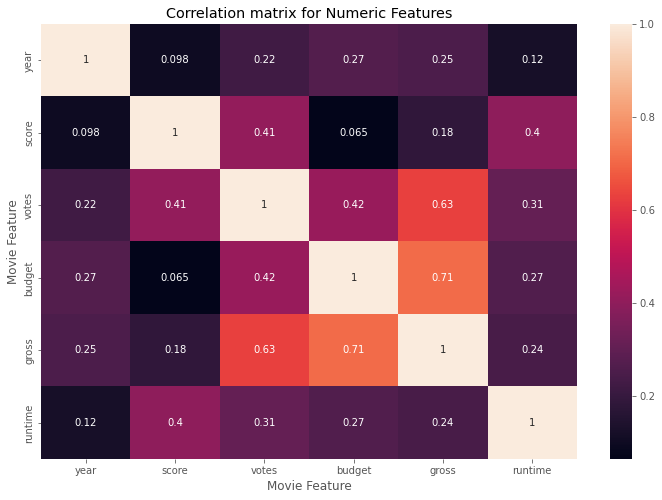

In [480]:
correlation_matrix = movies.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [481]:
# looks at Company
movies.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0


In [482]:
movies_numerized = movies

for col_name in movies_numerized:
    if(movies_numerized[col_name].dtype == "object"):
        movies_numerized[col_name] = movies_numerized[col_name].astype("category")
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes #random numerization of strings

movies_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,6,0,2009,696,7.8,1100000.0,1155,1778,2335,56,237000000,2847246203,2254,162.0
7445,535,6,0,2019,183,8.4,903000.0,162,743,2242,56,356000000,2797501328,1606,181.0
3045,6896,6,6,1997,704,7.8,1100000.0,1155,1778,1595,56,200000000,2201647264,2254,194.0
6663,5144,6,0,2015,698,7.8,876000.0,1125,2550,524,56,245000000,2069521700,1540,138.0
7244,536,6,0,2018,192,8.4,897000.0,162,743,2242,56,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,7,4,2000,1119,6.5,5200.0,730,1123,2320,55,35589876,1400,477,103.0
7625,6720,3,4,2019,1149,5.7,320.0,2546,2565,1915,56,35589876,790,2309,104.0
7580,4664,4,5,2019,1835,5.2,735.0,1445,2203,2279,56,35589876,682,1993,93.0
2417,3406,3,6,1993,85,7.3,5100.0,33,1718,2564,27,11900000,596,796,134.0


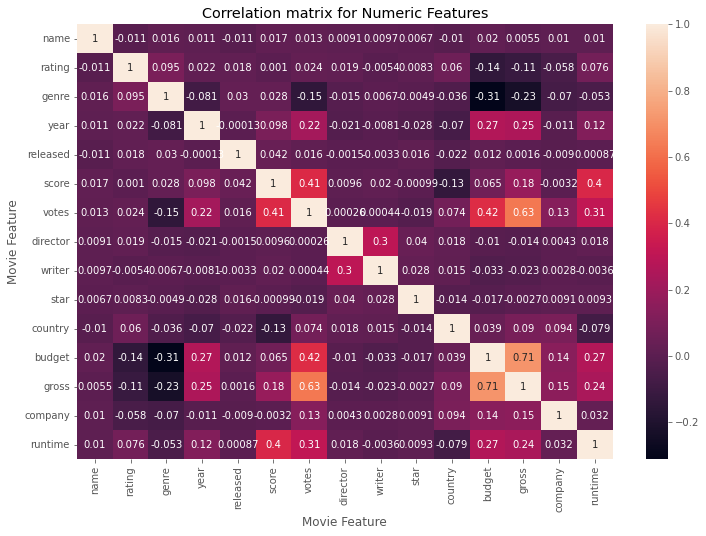

In [484]:
correlation_matrix = movies_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [485]:
movies_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011237,0.016355,0.011453,-0.010703,0.017095,0.013086,0.009079,0.009733,0.006742,-0.010397,0.020368,0.005466,0.010090,0.010390
rating,-0.011237,1.000000,0.095126,0.022121,0.017978,0.001049,0.023818,0.019494,-0.005397,0.008271,0.060419,-0.138802,-0.114898,-0.058357,0.075520
genre,0.016355,0.095126,1.000000,-0.081261,0.030296,0.027959,-0.145276,-0.015258,0.006701,-0.004873,-0.036475,-0.310566,-0.230267,-0.070442,-0.052699
year,0.011453,0.022121,-0.081261,1.000000,-0.000128,0.097936,0.222810,-0.020795,-0.008141,-0.027729,-0.069946,0.265578,0.252042,-0.011196,0.120766
released,-0.010703,0.017978,0.030296,-0.000128,1.000000,0.042324,0.016127,-0.001517,-0.003342,0.015566,-0.022202,0.012240,0.001613,-0.008963,0.000867
score,0.017095,0.001049,0.027959,0.097936,0.042324,1.000000,0.409182,0.009559,0.019689,-0.000991,-0.134228,0.064541,0.182868,-0.003163,0.399329
votes,0.013086,0.023818,-0.145276,0.222810,0.016127,0.409182,1.000000,0.000260,0.000436,-0.019447,0.073829,0.421007,0.628713,0.131574,0.309166
director,0.009079,0.019494,-0.015258,-0.020795,-0.001517,0.009559,0.000260,1.000000,0.299519,0.039700,0.017736,-0.010364,-0.014272,0.004295,0.017624
writer,0.009733,-0.005397,0.006701,-0.008141,-0.003342,0.019689,0.000436,0.299519,1.000000,0.028432,0.014760,-0.033237,-0.023210,0.002808,-0.003638
star,0.006742,0.008271,-0.004873,-0.027729,0.015566,-0.000991,-0.019447,0.039700,0.028432,1.000000,-0.014396,-0.016938,-0.002677,0.009117,0.009301


In [523]:
pd.set_option("max_rows", None)

corr_matrix = movies_numerized.corr()

corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs[sorted_pairs.between(0.5, 1)]

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.711270
budget    gross       0.711270
votes     gross       0.628713
gross     votes       0.628713
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross

# company has no correlation